## Общая информация

Предстоит разработать модель машинного обучения для предсказания судьбы стартапов

## Библиотеки и функции

In [4]:
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns

# Подготовка данных
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder

# Модели
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

# Для пайплайна
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Прочие
from phik import phik_matrix
from phik.report import plot_correlation_matrix
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV
import shap

In [5]:
def about_df(list_df):
    '''выводит информацию о всех датасетах из списка list_df'''
    for c, i in enumerate(list_df):
        display("**** DATASET_"+str(c+1)+' ****')
        display(i.info())
        display(i.describe().round(2).T)
        display(f'Количество дубликатов: {i.duplicated().sum()}')
        display('Количество пропущенных значений:', i.isnull().sum())
        print()

## Описание данных

Загрузим данные:

In [8]:
data_train = pd.read_csv('/home/ilya/Рабочий стол/YPrac/10.Kaggle/kaggle_startups_train_28062024.csv')
data_test = pd.read_csv('/home/ilya/Рабочий стол/YPrac/10.Kaggle/kaggle_startups_test_28062024.csv')

In [9]:
display(data_train.head(), data_test.head())

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaN
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaN
3,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaN


,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software|Video|Video Streaming,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209


Выведем информацию о датасетах:

In [11]:
about_df([data_train, data_test])

'**** DATASET_1 ****'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52515 non-null  object 
 1   category_list      50051 non-null  object 
 2   funding_total_usd  42447 non-null  float64
 3   status             52516 non-null  object 
 4   country_code       47014 non-null  object 
 5   state_code         45753 non-null  object 
 6   region             46157 non-null  object 
 7   city               46157 non-null  object 
 8   funding_rounds     52516 non-null  int64  
 9   founded_at         52516 non-null  object 
 10  first_funding_at   52516 non-null  object 
 11  last_funding_at    52516 non-null  object 
 12  closed_at          4917 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB


None

,count,mean,std,min,25%,50%,75%,max
funding_total_usd,42447.0,18247480.66,1.871173e+08,1.0,336027.5,2000000.0,10000000.0,3.007950e+10
funding_rounds,52516.0,1.74,1.370000e+00,1.0,1.0,1.0,2.0,1.900000e+01


'Количество дубликатов: 0'

'Количество пропущенных значений:'

name                     1
category_list         2465
funding_total_usd    10069
status                   0
country_code          5502
state_code            6763
region                6359
city                  6359
funding_rounds           0
founded_at               0
first_funding_at         0
last_funding_at          0
closed_at            47599
dtype: int64

'**** DATASET_2 ****'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   first_funding_at   13125 non-null  object 
 9   last_funding_at    13125 non-null  object 
 10  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB


None

,count,mean,std,min,25%,50%,75%,max
funding_total_usd,10547.0,16549102.70,92172825.63,1.0,320000.0,2000000.0,10000000.0,4.715000e+09
funding_rounds,13125.0,1.71,1.32,1.0,1.0,1.0,2.0,1.500000e+01
lifetime,13125.0,3097.61,2128.36,52.0,1726.0,2526.0,3866.0,1.716700e+04


'Количество дубликатов: 0'

'Количество пропущенных значений:'

name                    0
category_list         591
funding_total_usd    2578
country_code         1382
state_code           1695
region               1589
city                 1587
funding_rounds          0
first_funding_at        0
last_funding_at         0
lifetime                0
dtype: int64

**Вывод по разделу**
<br>Датасет 1 (data_train) состоит из 52516 строк. Колонки `name`, `category_list`, `funding_total_usd`, `country_code`, `state_code`, `region`, `city` и `closed_at` содержат пропуски. Их особенно много в колонке `closed_at`.
<br>Датасет 2 (data_test) состоит из 13125 строк. Колонки `category_list`, `funding_total_usd`, `country_code`, `state_code`, `region`, `city` содержат пропуски. Колонки `closed_at` в тестовых данных нет, что логично, поскольку о компаниях из тестовых данных неизвестно, закрылись ли они вообще. Колонки `founded_at` в тестовых данных тоже нет, зато есть колонка `lifetime`, которой нет в тренировочных данных. По сути эта колонка есть разница между `closed_at` и `founded_at`, поэтому в будущих разделах просто заменим дату основания и закрытия стартапа в data_train на время его существования (`lifetime`).

## Предобработка данных 

Посмотрим, сколько уникальных значений есть в колонках датафреймов

In [15]:
for i in data_train.columns.to_list():
    print(i, '---', data_train[i].nunique())
print()
for i in data_test.columns.to_list():
    print(i, '---', data_test[i].nunique())

name --- 52515
category_list --- 22105
funding_total_usd --- 15551
status --- 2
country_code --- 134
state_code --- 300
region --- 1036
city --- 4477
funding_rounds --- 19
founded_at --- 5402
first_funding_at --- 4603
last_funding_at --- 4305
closed_at --- 3008

name --- 13125
category_list --- 6206
funding_total_usd --- 4549
country_code --- 96
state_code --- 235
region --- 688
city --- 2117
funding_rounds --- 15
first_funding_at --- 3299
last_funding_at --- 3021
lifetime --- 3456


В обоих датасетах имеется много уникальных значений в колонках `category_list`, `country_code`, `state_code`, `region`, `city`. Большое количество уникальных категориальных значений может ухудшить обобщающую способность разрабатываемой модели, поэтому постараемся их сократить. В тоже время колонка `name` содержит уникальное значение в каждой строке, как и должно быть. Пройдемся по каждой колонке отдельно, изменения будем вностить в копии исходных датасетов. Задно будем заполнять пропущенные значения.

In [17]:
data_1 = data_train.copy()   # Копирование датасета
data_2 = data_test.copy()

In [18]:
data_1.isna().sum()

name                     1
category_list         2465
funding_total_usd    10069
status                   0
country_code          5502
state_code            6763
region                6359
city                  6359
funding_rounds           0
founded_at               0
first_funding_at         0
last_funding_at          0
closed_at            47599
dtype: int64

In [19]:
data_2.isna().sum()

name                    0
category_list         591
funding_total_usd    2578
country_code         1382
state_code           1695
region               1589
city                 1587
funding_rounds          0
first_funding_at        0
last_funding_at         0
lifetime                0
dtype: int64

### name

Проверим дубликаты без учета регистра в колонке `name` в обоих датасетах:

In [22]:
for i in [data_1, data_2]:
    print('Всего уник. значений -', i['name'].nunique(), '; Уник.значений в одном регистре -', i['name'].str.lower().nunique(), 
          '; Разница -', i['name'].nunique() - i['name'].str.lower().nunique())

Всего уник. значений - 52515 ; Уник.значений в одном регистре - 52472 ; Разница - 43
Всего уник. значений - 13125 ; Уник.значений в одном регистре - 13123 ; Разница - 2


In [23]:
for i in [data_1, data_2]:
    mask = i['name'].str.lower().duplicated(keep=False)        # Поиск строк с дублирующимися значениями в названии (без учета регистра)
    temp = i[mask]                                             # Новый датафрейм с отфильтрованными данными
    temp['name'] = temp['name'].str.lower()                    # Уменьшение регистра в названиях компаний
    print(temp[['name', 'funding_total_usd', 'city']].duplicated().sum())    # Подсчет дубликатов по 3м колонкам

0
0


/tmp/ipykernel_23911/2278361068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['name'] = temp['name'].str.lower()                    # Уменьшение регистра в названиях компаний
/tmp/ipykernel_23911/2278361068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['name'] = temp['name'].str.lower()                    # Уменьшение регистра в названиях компаний


Как видно, компании, которые отличаются регистром в названии это разные компании

In [25]:
data_1[data_1['name'].isnull()]    # Пропущенное значение

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
3291,NaN,Startups,25000.0,closed,USA,OR,"Portland, Oregon",Portland,1,2011-10-01,2012-03-01,2012-03-01,2013-06-03


In [26]:
data_1['name'] = data_1['name'].fillna('unknown')   # Заполним пропуск в колонке значением unknown
data_1.query('name == "unknown"')

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
3291,unknown,Startups,25000.0,closed,USA,OR,"Portland, Oregon",Portland,1,2011-10-01,2012-03-01,2012-03-01,2013-06-03


### category_list

Можно заметить, что в колонке со сферой деятельности (`category_list`) у некоторых компаний есть несколько значений. Оставим первую сферу как основную, а также создадим колонку, в которой укажем, сколько всего сфер есть у компании, и сделаем ее 3-ей по порядку (для удобства). 

In [29]:
for i in [data_1, data_2]:
    i['category_list'] = i['category_list'].str.replace('|', ';')   # Заменим '|' на ';' для удобства подсчета категорий
    temp = i['category_list'].str.count(';') + 1
    i.insert(2, 'category_cnt', temp)

In [30]:
display(data_1.head(2), data_2.head(2))

,name,category_list,category_cnt,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations;Restaurants,2.0,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaN
1,EarLens,Manufacturing;Medical;Medical Devices,3.0,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN


,name,category_list,category_cnt,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,1.0,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,1.0,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717


In [31]:
for i in [data_1, data_2]:
    i[['category_list', 'category_list_2']] = i['category_list'].str.split(';', n=1, expand=True) # отделим 1 категорию от остальных

In [32]:
data_1 = data_1.drop('category_list_2', axis=1)                   # Удалим колонку с лишними категориями
data_1 = data_1.rename(columns={'category_list': 'category'})     # Переименуем колонку с категорией стартапа в data_train

In [33]:
data_2 = data_2.drop('category_list_2', axis=1)                   # Удалим колонку с лишними категориями
data_2 = data_2.rename(columns={'category_list': 'category'})     # Переименуем колонку с категорией стартапа в data_test

In [34]:
display(data_1.head(2), data_2.head(2))

,name,category,category_cnt,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations,2.0,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaN
1,EarLens,Manufacturing,3.0,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN


,name,category,category_cnt,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,1.0,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,1.0,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717


In [35]:
data_1.category.nunique(), data_2.category.nunique()

(707, 559)

In [36]:
data_1['category'] = data_1['category'].fillna('unknown')   # Заполним пропуск в колонке значением unknown для 1ого датафрейма
data_2['category'] = data_2['category'].fillna('unknown')   # Заполним пропуск в колонке значением unknown для 2ого датафрейма
data_1.category.isna().sum(), data_2.category.isna().sum()

(0, 0)

### category_cnt

В данной колонке пропуски заполним нулями и изменим тип на числовой:

In [39]:
data_1['category_cnt'] = data_1['category_cnt'].fillna(0)   # Заполним пропуски в колонке значением 0 для 1ого датафрейма
data_2['category_cnt'] = data_2['category_cnt'].fillna(0)   # Заполним пропуски в колонке значением 0 для 2ого датафрейма
data_1.category.isna().sum(), data_2.category.isna().sum()

(0, 0)

In [40]:
for i in [data_1, data_2]:
    i['category_cnt'] = i['category_cnt'].astype(int)       # Смена типа в двух датафреймах

In [41]:
display(data_1.head(3), data_2.head(3))

,name,category,category_cnt,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations,2,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaN
1,EarLens,Manufacturing,3,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN
2,Reviva Pharmaceuticals,Biotechnology,1,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaN


,name,category,category_cnt,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,1,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,1,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,1,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295


### funding_total_usd

В данной колонке пропуски заполним медианным значением, а саму колонку приведем к типу int:

In [44]:
data_1['funding_total_usd'].median()

2000000.0

In [45]:
data_1['funding_total_usd'] = data_1['funding_total_usd'].fillna(data_1['funding_total_usd'].median())   # Заполним пропуски медианой для 1ого датафрейма
data_2['funding_total_usd'] = data_2['funding_total_usd'].fillna(data_2['funding_total_usd'].median())   # Заполним пропуски медианой для 2ого датафрейма
data_1.funding_total_usd.isna().sum(), data_2.funding_total_usd.isna().sum()

(0, 0)

In [46]:
for i in [data_1, data_2]:
    i['funding_total_usd'] = i['funding_total_usd'].astype(int)   # Смена типа в двух датафреймах

In [47]:
display(data_1.head(3), data_2.head(3))

,name,category,category_cnt,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations,2,828626,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaN
1,EarLens,Manufacturing,3,42935019,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN
2,Reviva Pharmaceuticals,Biotechnology,1,35456381,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaN


,name,category,category_cnt,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,1,2819200,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,1,2000000,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,1,428257,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295


### country_code, state_code, region, city

In [49]:
data_1.country_code.unique()

array(['CHE', 'USA', nan, 'GBR', 'RUS', 'ESP', 'FRA', 'SWE', 'IND', 'KOR',
       'AUS', 'TWN', 'CHN', 'HUN', 'CAN', 'FIN', 'BRA', 'EGY', 'PRT',
       'ISR', 'CHL', 'SVK', 'NLD', 'ARG', 'ARE', 'JPN', 'IRL', 'DEU',
       'LBN', 'EST', 'IDN', 'BEL', 'MEX', 'DNK', 'ITA', 'GRC', 'ROM',
       'TUR', 'SGP', 'SAU', 'MYS', 'NGA', 'QAT', 'VNM', 'BGR', 'GHA',
       'UGA', 'JOR', 'AUT', 'PAK', 'NZL', 'HKG', 'ZAF', 'LVA', 'NOR',
       'HRV', 'VEN', 'PER', 'LUX', 'SVN', 'POL', 'PHL', 'NIC', 'CZE',
       'ISL', 'PAN', 'URY', 'BGD', 'MCO', 'GTM', 'THA', 'TTO', 'UKR',
       'KEN', 'CRI', 'DZA', 'LTU', 'CYM', 'MUS', 'BLR', 'SLV', 'COL',
       'MLT', 'PSE', 'BLZ', 'CYP', 'MMR', 'MKD', 'KHM', 'GIB', 'SRB',
       'DOM', 'BWA', 'BLM', 'PRY', 'BMU', 'TAN', 'LIE', 'GRD', 'UZB',
       'GEO', 'SEN', 'ALB', 'ECU', 'MOZ', 'LKA', 'LAO', 'TUN', 'HND',
       'ZWE', 'BAH', 'MDA', 'MAF', 'BHR', 'AZE', 'MAR', 'KWT', 'IRN',
       'GGY', 'KNA', 'PRI', 'OMN', 'KAZ', 'JAM', 'NPL', 'ARM', 'TGO',
       'RWA', '

In [50]:
data_2.country_code.unique()

array(['NIC', 'USA', 'LUX', 'CAN', nan, 'MYS', 'DEU', 'GBR', 'FRA', 'ITA',
       'CHN', 'ARG', 'NLD', 'IRL', 'AUS', 'CHE', 'CHL', 'ESP', 'IND',
       'ISR', 'DNK', 'KOR', 'RUS', 'PHL', 'URY', 'SGP', 'BRA', 'EGY',
       'MEX', 'POL', 'VNM', 'AUT', 'EST', 'BEL', 'DMA', 'PRT', 'SWE',
       'JOR', 'HUN', 'HKG', 'JPN', 'ZAF', 'COL', 'BGR', 'CZE', 'GRC',
       'LTU', 'TWN', 'ISL', 'IDN', 'FIN', 'NOR', 'ARE', 'UKR', 'KEN',
       'NGA', 'TUR', 'CRI', 'THA', 'CYP', 'ROM', 'MMR', 'VEN', 'BHR',
       'NZL', 'SVK', 'CYM', 'LVA', 'MKD', 'PER', 'AZE', 'BWA', 'BGD',
       'ZWE', 'CIV', 'LKA', 'SVN', 'SRB', 'BLR', 'TAN', 'SAU', 'GHA',
       'CMR', 'TTO', 'PAK', 'BMU', 'PSE', 'UGA', 'MUS', 'JAM', 'LBN',
       'ECU', 'PAN', 'GTM', 'HRV', 'BRB', 'ZMB'], dtype=object)

В колонке `country_code` неестественных значений или неявных дубликатов не обнаружено. 
По сути колонки `country_code`, `state_code`, `region`, `city` представляют собой имена собственные, поэтому в них просто заполним пропуски значением 'unknown'.

In [52]:
cols = ['country_code', 'state_code', 'region', 'city']
for i in cols:
    data_1[i] = data_1[i].fillna('unknown')   # Заполним пропуски значением unknown для 1ого датафрейма
    data_2[i] = data_2[i].fillna('unknown')   # Заполним пропуски значением unknown для 2ого датафрейма
    print('Пропуски в обоих датафреймах в колонке', i, '-', data_1[i].isna().sum(), data_2[i].isna().sum())   # Для проверки

Пропуски в обоих датафреймах в колонке country_code - 0 0
Пропуски в обоих датафреймах в колонке state_code - 0 0
Пропуски в обоих датафреймах в колонке region - 0 0
Пропуски в обоих датафреймах в колонке city - 0 0


### funding_rounds

In [54]:
data_1.funding_rounds.unique(), data_2.funding_rounds.unique()

(array([ 2,  4,  3,  1,  5,  7,  9,  6,  8, 10, 11, 12, 15, 13, 16, 17, 14,
        18, 19]),
 array([ 1,  2,  4,  5,  3,  6,  7, 10, 12,  8,  9, 11, 13, 15, 14]))

Пропусков и необычных значений нет. Корректировать столбец не требуется

### Колонки с датами

В тестовых данных колонок `founded_at` и `closed_at` нет, зато есть колонка `lifetime`, которая и есть разница между `closed_at` и `founded_at`. Поэтому преобразуем данные колонки в datetime и расчитаем количество дней, сколько стартап смог прожить. Также преобразуем колонки `first_funding_at` и `last_funding_at` в datetime.

In [58]:
data_1.head(2)

,name,category,category_cnt,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations,2,828626,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaN
1,EarLens,Manufacturing,3,42935019,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN


In [59]:
for i in ['founded_at', 'first_funding_at', 'last_funding_at', 'closed_at']:
    data_1[i] = pd.to_datetime(data_1[i], format='%Y-%m-%d')

for i in ['first_funding_at', 'last_funding_at']:
    data_2[i] = pd.to_datetime(data_2[i], format='%Y-%m-%d')

In [60]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52516 non-null  object        
 1   category           52516 non-null  object        
 2   category_cnt       52516 non-null  int64         
 3   funding_total_usd  52516 non-null  int64         
 4   status             52516 non-null  object        
 5   country_code       52516 non-null  object        
 6   state_code         52516 non-null  object        
 7   region             52516 non-null  object        
 8   city               52516 non-null  object        
 9   funding_rounds     52516 non-null  int64         
 10  founded_at         52516 non-null  datetime64[ns]
 11  first_funding_at   52516 non-null  datetime64[ns]
 12  last_funding_at    52516 non-null  datetime64[ns]
 13  closed_at          4917 non-null   datetime64[ns]
dtypes: dat

Пропуски в датах есть только в колонке `closed_at`. Судя по всему это потому, что на момент формирования выгрузки эти стартапы еще не закрылись. Проверим это:

In [62]:
len(data_1[data_1.closed_at.isnull()]), data_1[data_1.closed_at.isnull()]['status'].value_counts()

(47599,
 status
 operating    47599
 Name: count, dtype: int64)

In [63]:
data_1['status'].value_counts()

status
operating    47599
closed        4917
Name: count, dtype: int64

In [64]:
data_1.query('closed_at == "2018-01-01"')

/tmp/ipykernel_23911/649377853.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  data_1.query('closed_at == "2018-01-01"')


,name,category,category_cnt,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at


Исходя из результата, заполним пропуки датой "2018-01-01" (датой формирования выгрузки). У закрывшихся стартапов такой даты нет.

In [66]:
data_1['closed_at'] = data_1['closed_at'].fillna('2018-01-01')

In [67]:
data_1['lifetime'] = data_1['closed_at'] - data_1['founded_at']   # Посчитаем количество дней между открытием и закрытием
data_1['lifetime'] = data_1['lifetime'].dt.days                   # Преобразуем в int
data_1 = data_1.drop(['founded_at', 'closed_at'], axis=1)         # Колонки с датой основания и закрытия в data_1 уже не нужны

In [68]:
data_1.head(3)

,name,category,category_cnt,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Lunchgate,Online Reservations,2,828626,operating,CHE,25,Zurich,Zürich,2,2011-05-01,2014-12-01,2998
1,EarLens,Manufacturing,3,42935019,operating,USA,CA,SF Bay Area,Redwood City,4,2010-05-04,2014-02-25,4748
2,Reviva Pharmaceuticals,Biotechnology,1,35456381,operating,USA,CA,SF Bay Area,San Jose,3,2012-08-20,2014-07-02,4383


In [69]:
data_2.head(3)

,name,category,category_cnt,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,1,2819200,NIC,17,unknown,unknown,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,1,2000000,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,1,428257,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295


Проверим, все ли пропуски заполнены и не были ли случайно удалены нужные данные:

In [71]:
data_train.info(), data_1.info(), data_test.info(), data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52515 non-null  object 
 1   category_list      50051 non-null  object 
 2   funding_total_usd  42447 non-null  float64
 3   status             52516 non-null  object 
 4   country_code       47014 non-null  object 
 5   state_code         45753 non-null  object 
 6   region             46157 non-null  object 
 7   city               46157 non-null  object 
 8   funding_rounds     52516 non-null  int64  
 9   founded_at         52516 non-null  object 
 10  first_funding_at   52516 non-null  object 
 11  last_funding_at    52516 non-null  object 
 12  closed_at          4917 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):

(None, None, None, None)

**Вывод**
<br> Исходя из выполненной работы

## EDA

Создадим 2 датафрема с действующими и закрытыми стартапами:

In [75]:
operate = data_1.query('status == "operating"')
closed = data_1.query('status == "closed"')

In [76]:
closed.head(3)

,name,category,category_cnt,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
12,Iberic Premium,unknown,0,107239,closed,unknown,unknown,unknown,unknown,1,2014-06-01,2014-06-01,714
16,Salesjob,unknown,0,2000000,closed,unknown,unknown,unknown,unknown,1,2013-10-22,2013-10-22,952
23,Vputi,Consumers,1,50000,closed,RUS,91,RUS - Other,Krasnoyarsk,1,2013-03-08,2013-03-08,861


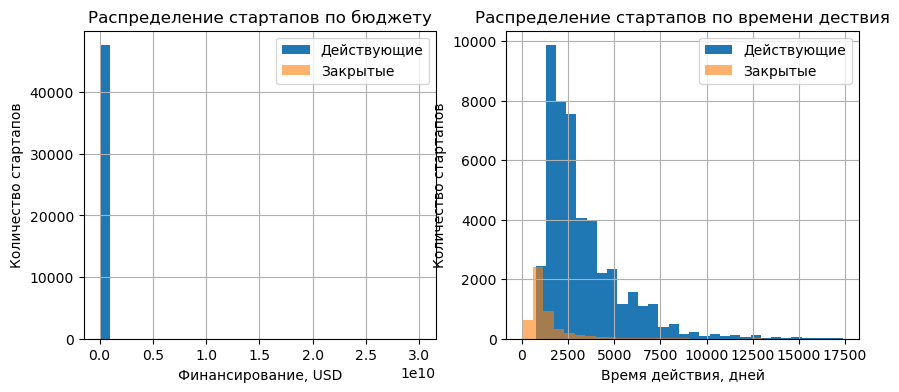

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axe = axes.ravel()
operate.funding_total_usd.hist(bins=30, ax=axe[0], label='Действующие')       # Гистограммы финансирования
closed.funding_total_usd.hist(bins=30, ax=axe[0], label='Закрытые', alpha=0.6)
axe[0].set_title('Распределение стартапов по бюджету')
axe[0].set_xlabel('Финансирование, USD')
axe[0].set_ylabel('Количество стартапов')
axe[0].legend()

operate.lifetime.hist(bins=30, ax=axe[1], label='Действующие')                     # Гистограммы срока жизни
closed.lifetime.hist(bins=30, ax=axe[1], label='Закрытые', alpha=0.6)
axe[1].set_title('Распределение стартапов по времени дествия')
axe[1].set_xlabel('Время действия, дней')
axe[1].set_ylabel('Количество стартапов')
axe[1].legend()

plt.show()

Как видно из гистограмм, подавлющее большинство стартапов имею малые бюджеты. При этом, если компания проживет примерно 3 года, то она скорее всего не закроется.
<br>Посмотрим, скольким стартапам удалось привлечь более 150 млн. долларов:

In [79]:
len(data_1.query('funding_total_usd > 55000000')), len(data_1.query('funding_total_usd > 55000000'))*100 / len(data_1)

(2664, 5.072739736461269)

In [80]:
data_1.query('funding_total_usd > 55000000')['status'].value_counts()

status
operating    2502
closed        162
Name: count, dtype: int64

Всего 2664 стартапам (5%) удалось привлечь более 55 млн. И 2502 из них до сих пор функционируют. Посмотрим на распределение финансирования между менее финансиремыми компаниями:

In [82]:
small_start = data_1.query('funding_total_usd <= 55000000')
len(small_start)

49852

In [83]:
operate_small = small_start.query('status == "operating"')
closed_small = small_start.query('status == "closed"')

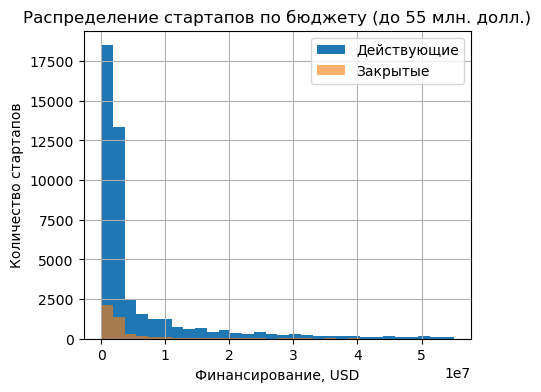

In [84]:
operate_small.funding_total_usd.hist(bins=30, label='Действующие', figsize=(5, 4))       # Гистограммы финансирования
closed_small.funding_total_usd.hist(bins=30, label='Закрытые', alpha=0.6, figsize=(5, 4))
plt.title('Распределение стартапов по бюджету (до 55 млн. долл.)')
plt.xlabel('Финансирование, USD')
plt.ylabel('Количество стартапов')
plt.legend();

Картина стала более ясной. Большое количество компаний имеют малое финансирование. Скорее всего это вызвано нежеланием инвесторов вкладывать большие суммы в такие рискованные сферы.

## Разработка новых признаков